<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220712.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* regressor
* customer analysis 
* iteration

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as gg
from plotnine import ggplot, aes
from datetime import datetime, date, time, timezone, timedelta
import os 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import KNNImputer 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, accuracy_score, mean_squared_error
import sklearn.datasets as skd

# Regressor

In [8]:
raw = skd.load_diabetes()
x = pd.DataFrame(raw['data'], columns = raw['feature_names'])
y = pd.DataFrame(raw['target'])
x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [9]:
x = x.assign(sex = lambda x : np.where(x.sex > 0, 1, 0))
x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,1,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,0,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,1,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,0,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,0,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [10]:
x_ = pd.get_dummies(x, columns = ['sex'])
x_.head()

,age,bmi,bp,s1,s2,s3,s4,s5,s6,sex_0,sex_1
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,0,1
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,1,0
2,0.085299,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,0,1
3,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,1,0
4,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,1,0


In [12]:
wow = pd.melt(x, id_vars = ['age', 'sex'])
wow.head()

,age,sex,variable,value
0,0.038076,1,bmi,0.061696
1,-0.001882,0,bmi,-0.051474
2,0.085299,1,bmi,0.044451
3,-0.089063,0,bmi,-0.011595
4,0.005383,0,bmi,-0.036385


/usr/local/lib/python3.7/dist-packages/plotnine/facets/facet_grid.py:136: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  margin_vars = [list(data.columns & self.rows),
/usr/local/lib/python3.7/dist-packages/plotnine/facets/facet_grid.py:137: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  list(data.columns & self.cols)]
/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


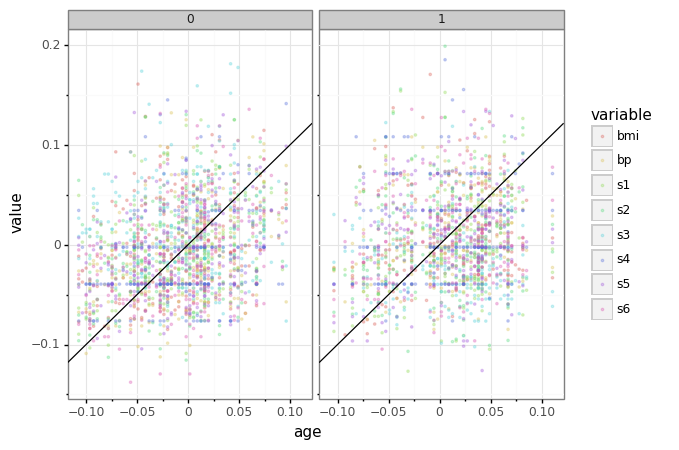

<ggplot: (8771521879513)>

In [15]:
(
    ggplot(wow, aes('age', 'value', color = 'variable')) +
    gg.geom_point(alpha= .3, size = .5) +
    gg.geom_abline() +
    gg.facet_grid('~sex') +
    gg.theme_bw()
)

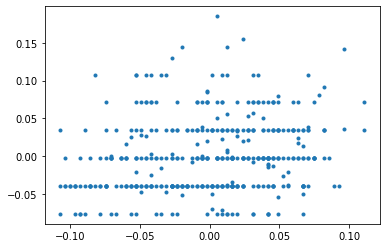

In [18]:
plt.plot(x['age'], x['s4'], '.')

In [19]:
x['s4'].value_counts()

-0.039493    128
-0.002592    108
 0.034309     68
 0.071210     33
-0.076395     28
            ... 
 0.071948      1
 0.056081      1
-0.012556      1
-0.008127      1
 0.026560      1
Name: s4, Length: 66, dtype: int64

In [20]:
x_tr, x_te, y_tr, y_te = train_test_split(x_, y, train_size = .7)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


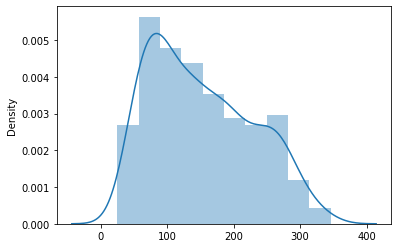

In [22]:
sns.distplot(y)

In [24]:
fit_lm = LinearRegression().fit(x_tr, y_tr)
fit_rf = RandomForestRegressor().fit(x_tr, y_tr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [25]:
pred_lm = fit_lm.predict(x_te)
pred_rf = fit_rf.predict(x_te)

In [26]:
mean_squared_error(y_te, pred_lm), mean_squared_error(y_te, pred_rf)

(3016.9810939116815, 3388.0177541353382)

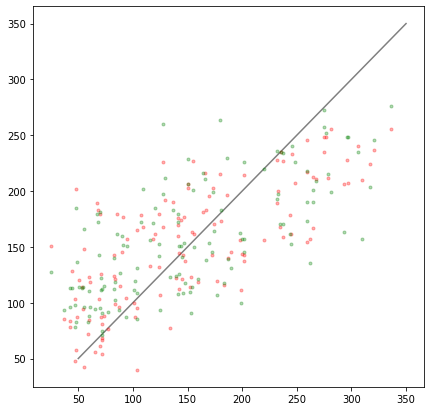

In [33]:
plt.figure(figsize = [7,7])
plt.plot([50, 350], [50, 350], color = 'gray')
plt.plot(y_te.values, pred_lm, '.', alpha = .3, color = 'red')
plt.plot(y_te.values, pred_rf, '.', alpha = .3, color = 'green')

# Customer Analysis

In [34]:
os.listdir()

['.config',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'online_retail_II.xlsx',
 'ecommerce-data.csv',
 'retail_data_transactions.csv',
 '.Rhistory',
 'sales_train.csv',
 'sample_submission.csv',
 'item_categories.csv',
 'rfm_test.csv',
 'test.csv',
 'shops.csv',
 'listings.csv',
 'items.csv',
 'retail_data_response.csv',
 'sample_data']

In [50]:
df = pd.read_csv('rfm_test.csv')
df.head()

,Unnamed: 0,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [51]:
df = df[(~df['invoiceno'].astype(str).str.contains('C')) & (df['country'] == 'United Kingdom')]
df.head()

,Unnamed: 0,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [52]:
df['date'] = pd.to_datetime(df['invoicedate']).to_numpy().astype('datetime64[D]')
df['month'] = df['date'].to_numpy().astype('datetime64[M]')
df['rev'] = df['quantity'] * df['unitprice']
df.head()

,Unnamed: 0,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,date,month,rev
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,20.34


In [53]:
df = df[['customerid', 'date', 'month', 'rev']].rename(columns = {'customerid':'id'})
df = df.groupby(['id', 'date', 'month'])['rev'].sum().reset_index()
df.head()

,id,date,month,rev
0,12346.0,2011-01-18,2011-01-01,77183.60
1,12747.0,2010-12-05,2010-12-01,358.56
2,12747.0,2010-12-13,2010-12-01,347.71
3,12747.0,2011-01-20,2011-01-01,303.04
4,12747.0,2011-03-01,2011-03-01,310.78


In [60]:
info_m = df.groupby(['id', 'month'])['rev'].sum().reset_index().rename(columns = {'rev':'money'})
info_m = pd.pivot_table(info_m, index = 'id', columns = 'month', values = 'money').reset_index()
info_m = pd.melt(info_m, id_vars = 'id', var_name = 'month', value_name = 'money').sort_values(['id', 'month'], ascending = [1,0])
info_m = info_m.groupby(['id']).head(3)
info_m = info_m.groupby(['id'])['money'].sum().reset_index()
info_m.head()

,id,money
0,12346.0,0.00
1,12747.0,1426.61
2,12748.0,14002.34
3,12749.0,1335.65
4,12820.0,554.11


In [61]:
info_f = df.groupby(['id', 'month'])['rev'].count().reset_index().rename(columns = {'rev':'freq'})
info_f = pd.pivot_table(info_f, index = 'id', columns = 'month', values = 'freq').reset_index()
info_f = pd.melt(info_f, id_vars = 'id', var_name = 'month', value_name = 'freq').sort_values(['id', 'month'], ascending = [1,0])
info_f = info_f.groupby(['id']).head(3)
info_f = info_f.groupby(['id'])['freq'].sum().reset_index()
info_f.head()

,id,freq
0,12346.0,0.0
1,12747.0,3.0
2,12748.0,33.0
3,12749.0,2.0
4,12820.0,2.0


In [62]:
df['date'].max()

Timestamp('2011-12-09 00:00:00')

In [63]:
date_now = datetime(2011,12,31)

In [66]:
info_r = df.groupby(['id']).agg({'date' : lambda x : (date_now - x.max()).days}).reset_index().rename(columns = {'date':'recency'})
info_r.head()

,id,recency
0,12346.0,347
1,12747.0,24
2,12748.0,22
3,12749.0,25
4,12820.0,25


In [68]:
info = pd.merge(pd.merge(info_r, info_f, 'left', 'id'), info_m, 'left', 'id')
info.head()

,id,recency,freq,money
0,12346.0,347,0.0,0.00
1,12747.0,24,3.0,1426.61
2,12748.0,22,33.0,14002.34
3,12749.0,25,2.0,1335.65
4,12820.0,25,2.0,554.11


In [70]:
info = info.assign(r = pd.qcut(info['recency'], 5, list('54321')),
                   f = pd.qcut(info['freq'].rank(method = 'first'), 5, list('12345')),
                   m = pd.qcut(info['money'].rank(method = 'first'), 5, list('12345'))
                               )
info.head()

,id,recency,freq,money,r,f,m
0,12346.0,347,0.0,0.00,1,1,1
1,12747.0,24,3.0,1426.61,5,5,5
2,12748.0,22,33.0,14002.34,5,5,5
3,12749.0,25,2.0,1335.65,5,4,5
4,12820.0,25,2.0,554.11,5,4,4


In [71]:
info.assign(rf = info['r'].astype(str) + info['f'].astype(str))

,id,recency,freq,money,r,f,m,rf
0,12346.0,347,0.0,0.00,1,1,1,11
1,12747.0,24,3.0,1426.61,5,5,5,55
2,12748.0,22,33.0,14002.34,5,5,5,55
3,12749.0,25,2.0,1335.65,5,4,5,54
4,12820.0,25,2.0,554.11,5,4,4,54
...,...,...,...,...,...,...,...,...
3916,18280.0,299,0.0,0.00,1,3,3,13
3917,18281.0,202,0.0,0.00,1,3,3,13
3918,18282.0,29,1.0,77.84,5,4,3,54
3919,18283.0,25,5.0,974.21,5,5,5,55


# Iteration

In [72]:
mat = [list('ABC'), list('DEF'), list('GHI')]
mat

[['A', 'B', 'C'], ['D', 'E', 'F'], ['G', 'H', 'I']]

In [73]:
for r, row in enumerate(mat) :
  for c, letter in enumerate(row) :
    print(f'({r},{c}) - {letter}')

(0,0) - A
(0,1) - B
(0,2) - C
(1,0) - D
(1,1) - E
(1,2) - F
(2,0) - G
(2,1) - H
(2,2) - I


In [75]:
from functools import reduce

In [76]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'age': 73,
  'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M'},
 {'age': 29,
  'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F'},
 {'age': 51,
  'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M'},
 {'age': 32,
  'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F'},
 {'age': 42, 'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F'}]

In [77]:
reduce(lambda acc, cur : acc + cur['age'], users, 0)

227

In [79]:
reduce(lambda acc, cur : acc + [cur['mail']], users, [])

['gregorythomas@gmail.com',
 'hintoncynthia@hotmail.com',
 'wwagner@gmail.com',
 'daniel79@gmail.com',
 'ujackson@gmail.com']